In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [30]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [31]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [32]:
df.shape

(200, 4)

In [33]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [34]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [36]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [39]:
df.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

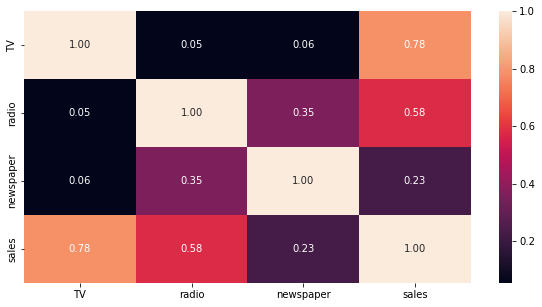

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

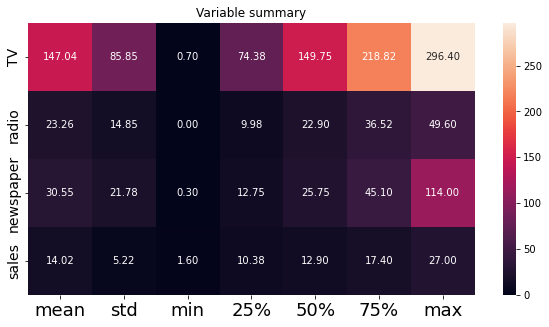

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable summary")
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Density'>

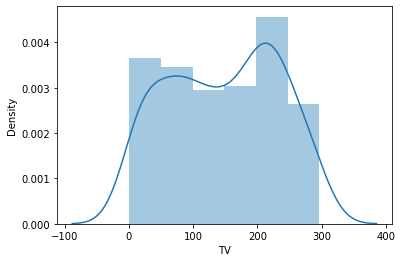

In [42]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

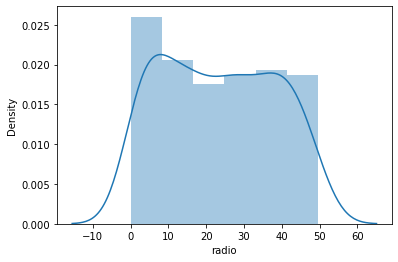

In [43]:
sns.distplot(df['radio'])


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

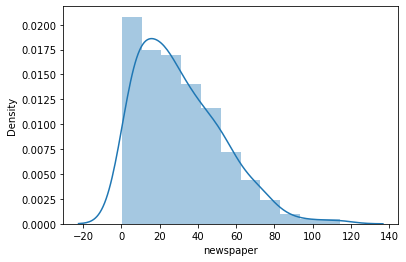

In [44]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

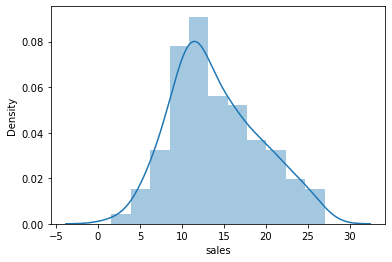

In [45]:
sns.distplot(df['sales'])

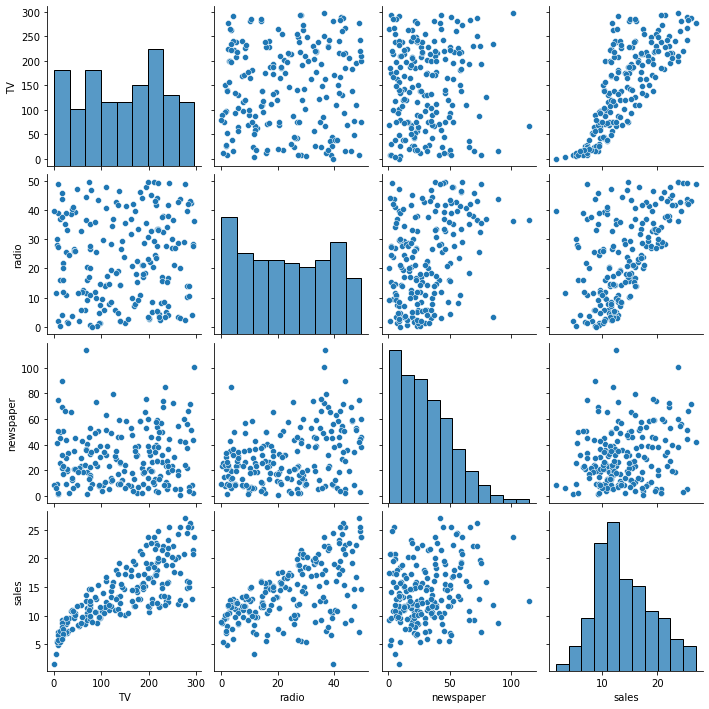

In [53]:
sns.pairplot(df,size=2.5)

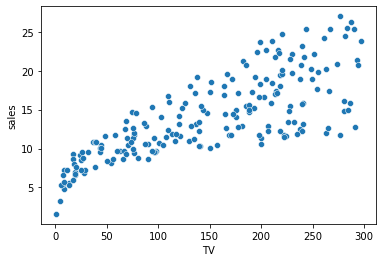

In [54]:
sns.scatterplot(x='TV',y='sales',data=df)
plt.show()

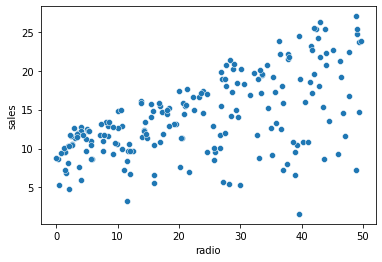

In [55]:
sns.scatterplot(x='radio',y='sales',data=df)
plt.show()

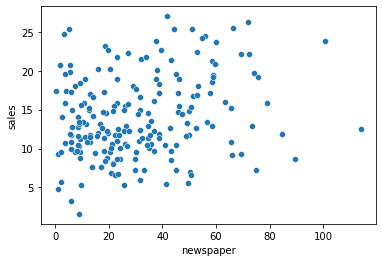

In [56]:
sns.scatterplot(x='newspaper',y='sales',data=df)
plt.show()

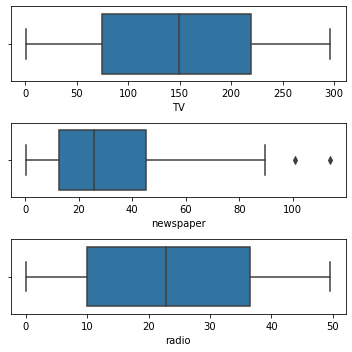

In [57]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='sales'>

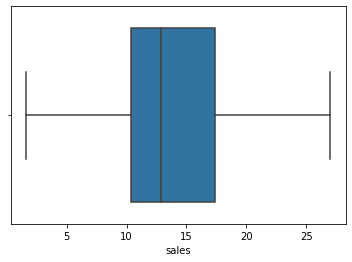

In [58]:
sns.boxplot(df['sales'])

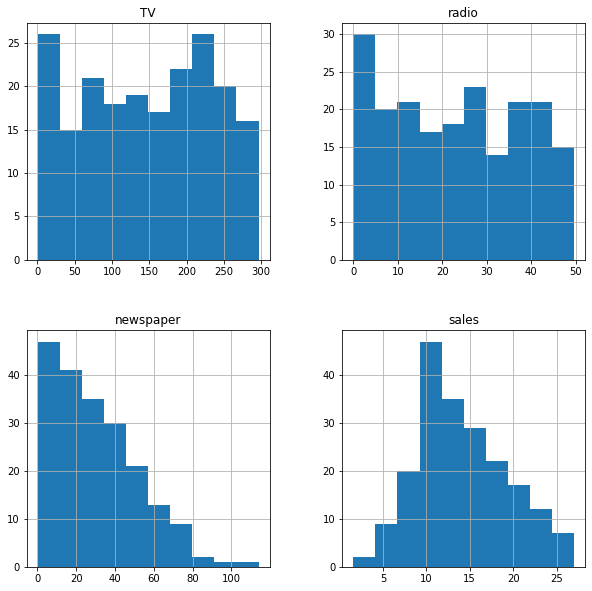

In [59]:
df.hist(bins=10, figsize=(10,10))
plt.show()

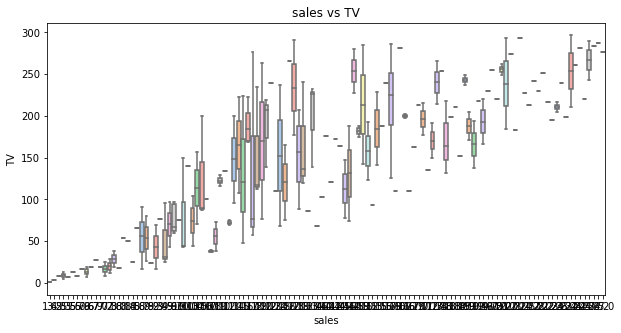

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(df['sales'],df['TV'],palette = 'pastel')
plt.title('sales vs TV')
plt.show()

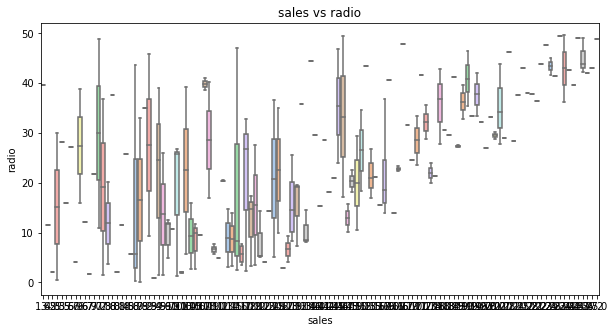

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(df['sales'],df['radio'],palette='pastel')
plt.title('sales vs radio')
plt.show()

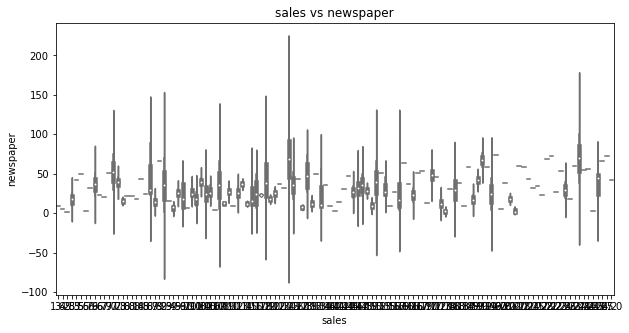

In [64]:
plt.figure(figsize=(10,5))
sns.violinplot(df['sales'],df['newspaper'],palette='pastel')
plt.title('sales vs newspaper')
plt.show()

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(200, 4)

In [66]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [67]:
len(np.where(z>3)[0])

2

In [68]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print('total_droped_rows',df.shape[0] - df_new.shape[0])

old dataframe (200, 4)
new dataframe (198, 4)
total_droped_rows 2


In [70]:
loss_percentage=(2/200)*100
loss_percentage

1.0

In [71]:
y=df_new['sales']
x=df_new.drop(['sales'],axis=1)

In [72]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [73]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [74]:
from sklearn.model_selection import train_test_split


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (158, 3)
Shape of x_test : (40, 3)
Shape of y_train : (158,)
Shape of y_test : (40,)


In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
print(lr.intercept_)
print(lr.coef_)

2.8345658197711288
[ 0.04741709  0.1848088  -0.00284655]


In [82]:
y_pred=lr.predict(x_test)

In [85]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.6810899098347154


In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.891219907737298

In [93]:
from sklearn.model_selection import GridSearchCV
model=LinearRegression()
parameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}
grid=GridSearchCV(model,parameters,cv=None)
grid.fit(x_train,y_train)
print('R2 / varience',grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(x_test) - y_test) ** 2))

R2 / varience 0.8866898724029202
Residual sum of squares: 2.83


In [96]:
grid_pred=grid.best_estimator_.predict(x_test)

In [ ]:
import joblib
joblib.dump(grid.best_estimator_,'Advertising Sales Channel Prediction.pkl')